In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [9]:
#grabbing a random array
sample = mnist.train.images[2].reshape(28,28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

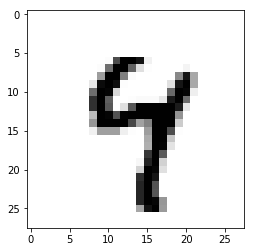

In [11]:
plt.imshow(sample,cmap='Greys')

In [85]:
learning_rate = 0.001
training_epochs = 50
batch_size = 100

In [86]:
n_classes = 10
n_samples = mnist.train.num_examples

In [87]:
n_input = 784

In [88]:
n_hidden_1 = 256
n_hidden_2 = 256

In [89]:
def multilayer_perceptron(x,weights,bias):
    '''
    x: Placeholder for Data input
    weights: Dictionary of weights
    biases: Dictionary of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # Func (X * W + B) = RELU -->f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer
    

In [90]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}

In [91]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])),
}

In [92]:
x = tf.placeholder('float',[None,n_input])

In [93]:
y = tf.placeholder('float',[None,n_classes])

In [94]:
pred = multilayer_perceptron(x,weights,biases)

In [95]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels =y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Run the Session, Train the Model

In [96]:
sess = tf.InteractiveSession()

In [97]:
init = tf.global_variables_initializer()

In [98]:
sess.run(init)

In [99]:
#50 Loops
for epoch in range(training_epochs):
    
    #Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost158.9729
Epoch: 2 cost37.8139
Epoch: 3 cost24.1172
Epoch: 4 cost16.8111
Epoch: 5 cost12.2213
Epoch: 6 cost8.9702
Epoch: 7 cost6.6785
Epoch: 8 cost5.0954
Epoch: 9 cost3.7502
Epoch: 10 cost2.7909
Epoch: 11 cost2.0681
Epoch: 12 cost1.5498
Epoch: 13 cost1.2637
Epoch: 14 cost0.9287
Epoch: 15 cost0.7587
Epoch: 16 cost0.7161
Epoch: 17 cost0.5961
Epoch: 18 cost0.6422
Epoch: 19 cost0.3805
Epoch: 20 cost0.4561
Epoch: 21 cost0.3106
Epoch: 22 cost0.3693
Epoch: 23 cost0.3580
Epoch: 24 cost0.3346
Epoch: 25 cost0.2867
Epoch: 26 cost0.2938
Epoch: 27 cost0.3146
Epoch: 28 cost0.2779
Epoch: 29 cost0.2337
Epoch: 30 cost0.2476
Epoch: 31 cost0.2628
Epoch: 32 cost0.2868
Epoch: 33 cost0.2207
Epoch: 34 cost0.2065
Epoch: 35 cost0.2063
Epoch: 36 cost0.2330
Epoch: 37 cost0.1953
Epoch: 38 cost0.1876
Epoch: 39 cost0.2171
Epoch: 40 cost0.1814
Epoch: 41 cost0.1742
Epoch: 42 cost0.2212
Epoch: 43 cost0.1962
Epoch: 44 cost0.1555
Epoch: 45 cost0.1751
Epoch: 46 cost0.1297
Epoch: 47 cost0.1680
Epoch: 48 cost0.

# Model Evaluations

In [100]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [101]:
correct_predictions = tf.cast(correct_predictions,'float')

In [102]:
accuracy = tf.reduce_mean(correct_predictions)

In [103]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9601